# Como preparar e transformar dados usando Python

**Vamos mostrar nessa aula o que fazer ao receber um banco de dados _sujo_**:
- A remoção de linhas que contenham o dado;  
- A alteração dos dados específicos utilizando um número médio que não afete a análise.

**Também vamos aprender como Normalizar e Padronizar os dados**:
- Normalização e Padronização de dados
<a name="intro"></a>
### Sumário
1. [Removendo dados estranhos](#git1)
2. [Substituindo valores](#git2)
3. [Normalização e Padronização de dados](#git3)

Ao receber um conjunto de dados, provavelmente podem ser encontrados erros, inconsistências e informações dobradas. Antes de realizar qualquer análise estatística ou aplicação de algoritmos, devemos realizar uma limpeza na base de dados colhida.

Para a leitura e manipulação de tabelas, utilizaremos a biblioteca _pandas_, que pode ser facilmente instalada através do comando _pip install pandas_.

O banco de dados será o arquivo CSV (que pode ser aberto também no Excel e em outros leitores de planilha).

Também utilizaremos a biblioteca matplotlib, uma das mais utilizadas para visualizar os dados por meio de gráficos.
Vamos importar as bibliotecas!

In [72]:
import random
random.seed(1)

import pandas as pd
import matplotlib.pyplot as plt

### 1. Removendo dados estranhos <a name="git1"></a> [🠡](#intro)

Agora, vamos associar os dados "iris-with-errors.csv" à variável _data_, chamar o _print_ contendo o número de linhas e colunas através do comando shape e exibir as 25 primeiras linhas (incluindo o cabeçalho)

In [73]:
data = pd.read_csv('dados/iris-with-errors.csv', header=(0))
print("Linha, coluna:", data.shape)
data.head(25)

Linha, coluna: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Podemos ver alguns erros:
1. O caractere "?"
2. A expressão _NaN_, quando o computador não sabe de que tipo é a informação
3. Na coluna _species_, são indicadas se as linhas são duplicadas

Precisamos rever os dados ou descartá-los. Aqui, vamos escolher a segunda opção e utilizar o pandas para isso.

In [74]:
data = data.dropna() # Remove os dados NaN
data.duplicated() # Verifica se há dados duplicados

0     False
1      True
2     False
3     False
4      True
6     False
7     False
8      True
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

Podemos perceber no _Output_ acima que as linhas duplicadas receberam o estado **True**. De duas linhas iguais, somente a que vem depois da primeira é a "duplicada". Vamos descartar essas linhas!

In [75]:
data = data.drop_duplicates()
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


Agora só falta removermos as interrogações "?". Um dos modos de fazer isso é transformar tal caractere em um _NaN_, e logo em seguida limpar novamente as linhas que contenham _NaN_.

In [76]:
import numpy as np
data = data.replace('?', np.nan) # Usa o comando replace para substituir as interrogações em NaN's
data = data.dropna() # Remove as linhas que contenham NaN
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


Com os dados limpos, não precisamos mais das classificações da coluna **species**, certo? Vamos remove-la!

In [77]:
print("Vamos remover a coluna:", data.columns[4]) # Para exibir as colunas que serão removidas, use o comando .columns
data = data.drop(data.columns[4], axis=1) # Nesse comando, precisamos indicar o axis=1 que significa coluna
data.head(2) # Pra verificarmos se a coluna foi removida, podemos visualizar apenas poucas linhas.

Vamos remover a coluna: species


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
3,4.7,3.2,1.3,0.2


Caso mais algum dado distoe e você queira remover diretamente uma linha escolhida, podemos utilizar o comando acima com a indicação **axis=0** indicando o número e o tipo linha.

In [78]:
print("Vamos remover as linhas:", data.index[[0, 2]]) # Para exibir as linhas que serão removidas, use o comando .index
data = data.drop(data.index[[0, 2]], axis=0)
data.head(25)

Vamos remover as linhas: Int64Index([0, 6], dtype='int64')


,sepal_length,sepal_width,petal_length,petal_width
3,4.7,3.2,1.3,0.2
7,5.4,3.9,1.7,0.4
10,5,3.4,1.5,0.2
11,4.4,2.9,1.4,0.2
12,4.9,3.1,1.5,0.1
13,5.4,3.7,1.5,0.2
15,4.8,3.4,1.6,0.2
16,4.8,3,1.4,0.1
18,4.3,3,1.1,0.1
19,5.8,4,1.2,0.2


Pronto! Removemos as linhas _[0, 2]_, ou seja, a primeira e a terceira linha, de número **0** e **6**.

### 2. Substituindo valores <a name="git2"></a> [🠡](#intro)
 
Se forem constatados valores ausentes, podemos substitui-los facilmente. Vamos utilizar agora a variável _data_ausente_, relacionada aos mesmos dados iniciais.

In [79]:
data_ausente = pd.read_csv('dados/iris-with-errors.csv', header=(0))
print(data_ausente.shape) # Número de linhas e colunas, lembra?
data_ausente.head(50) # Opa! Eu quero agora exibir 50 linhas, o que será que vai acontecer?

(25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Agora nós estamos com dó de descartar os dados, pois a linha ainda possui informações usáveis. Um jeito inteligente é substituir os valores "?" e os "NaN", colocando no lugar um **valor médio**, ou seja, o valor que seria mais provável naquele lugar. Essa opção é boa para esse caso, pois não possuímos muitas linhas de dados, e removê-las ocasionaria em menos informação.

In [80]:
import numpy as np
data_ausente = data_ausente.replace('?', np.nan) # Transformamos os "?" em NaN


# Vamos usar o comando abaixo para transformar as linhas e colunas em formato Numpy (em Arrays)
X = np.array(data_ausente[data_ausente.columns[0:data_ausente.shape[1]-1]], dtype = float) # Também ignoramos a última coluna

averages = np.nanmean(X, axis = 0) # Usamos a função nanmean que calcula a média (ou mediana em alguns casos) ignorando os Nan
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # Vamos verificar se é um dado NaN
            X[i,j] = averages[j] # Inserimos a média
print(X) # Exibimos o Array que foi construído, calculado e alterado

# Documentação - https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html

[[5.1        3.5        1.4        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.4        3.9        1.7        0.4       ]
 [5.4        3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.22608696]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.4        3.7        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [4.8        3.         1.4        0.1       ]
 [4.4        2.9        1.4        0.2       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4.4        1.5        0.4       ]
 [5.4        

### 3. Normalização e Padronização de dados <a name="git3"></a> [🠡](#intro)
#### 3.1 Normalização
A **Normalização** é o método em que pegamos o maior dado da planilha e transformamos em **1**, e o menor em **0**. Os que estiverem entre eles serão **normalizados**. Para isso vamos utilizar a biblioteca sklearn que já faz isso para nós.

Importamos o banco de dados _iris.csv_ e associamos à variável _data_normalizada_, importamos as bibliotecas _numpy_ e _sklearn_. Transformamos a tabela em Array como da última vez, ignorando a última coluna.

**Atenção!!**: Não esqueça de instalar a nova biblioteca utilizando o comando _pip install sklearn_.

In [81]:
data_normalizada = pd.read_csv('dados/iris.csv', header=(0))

import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = np.array(data_normalizada[data_normalizada.columns[0:data.shape[1]-1]]) # Transformação em Array ignorando última coluna
for i in range(X.shape[1]):
    print("MAIOR valor da coluna", i, "=", max(X[:,i]))
    print("MENOR Valor da coluna", i, "=", min(X[:,i]))
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1)) # O mínimo e o máximo aqui será "0" e "1"
# Realiza a normalização e coloca em um novo vetor
X_norm = scaler.fit_transform(X) # A variável X_norm será a matriz criada através do comando .scaler
print(X_norm)

MAIOR valor da coluna 0 = 7.9
MENOR Valor da coluna 0 = 4.3
MAIOR valor da coluna 1 = 4.4
MENOR Valor da coluna 1 = 2.0
MAIOR valor da coluna 2 = 6.9
MENOR Valor da coluna 2 = 1.0
[[0.22222222 0.625      0.06779661]
 [0.16666667 0.41666667 0.06779661]
 [0.11111111 0.5        0.05084746]
 [0.08333333 0.45833333 0.08474576]
 [0.19444444 0.66666667 0.06779661]
 [0.30555556 0.79166667 0.11864407]
 [0.08333333 0.58333333 0.06779661]
 [0.19444444 0.58333333 0.08474576]
 [0.02777778 0.375      0.06779661]
 [0.16666667 0.45833333 0.08474576]
 [0.30555556 0.70833333 0.08474576]
 [0.13888889 0.58333333 0.10169492]
 [0.13888889 0.41666667 0.06779661]
 [0.         0.41666667 0.01694915]
 [0.41666667 0.83333333 0.03389831]
 [0.38888889 1.         0.08474576]
 [0.30555556 0.79166667 0.05084746]
 [0.22222222 0.625      0.06779661]
 [0.38888889 0.75       0.11864407]
 [0.22222222 0.75       0.08474576]
 [0.30555556 0.58333333 0.11864407]
 [0.22222222 0.70833333 0.08474576]
 [0.08333333 0.66666667 0.  

In [82]:
print('Mínimo dos atributos:', np.amin(X_norm, axis=0))
print('Máximo dos atributos:', np.amax(X_norm, axis=0))

Mínimo dos atributos: [0. 0. 0.]
Máximo dos atributos: [1. 1. 1.]


#### 3.1 Padronização
A **Padronização** de dados possui o mesmo objetivo que a **Normalização**, que é o de transformar todos os dados para que fiquem em uma certa ordem de grandeza. A diferença é que na Padronização, **a média é igual a 0** e **o desvio padrão é igual a 1**.

Vamos utilizar a biblioteca **sklearn** para padronizar nossos dados!

In [83]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('dados/iris.csv', header=(0))
data_matriz = np.array(data[data.columns[0:data.shape[1]-1]]) # arquivo CSV transformado em matriz (array)
padronizador = StandardScaler().fit(data_matriz) # média = 0, desvio padrão = 1
matriz_padronizada = padronizador.transform(data_matriz)

print(matriz_padronizada)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

É interessante notar que agora possuímos valores **negativos** em nossa matriz padronizada. Isso acontece pois **a média é igual a zero**, além do desvio padrão igual a **um**.

Vamos calcular a média de cada coluna da nossa matriz padronizada!

In [84]:
for i in np.arange(0,matriz_padronizada.shape[1]):
    print('A Média da coluna', i, 'é:', np.mean(matriz_padronizada[:,i]))
    print('O desvio padrão da coluna', i, 'é:', np.std(matriz_padronizada[:,i]), '\n')

A Média da coluna 0 é: -4.736951571734001e-16
O desvio padrão da coluna 0 é: 1.0 

A Média da coluna 1 é: -6.631732200427602e-16
O desvio padrão da coluna 1 é: 0.9999999999999999 

A Média da coluna 2 é: 3.315866100213801e-16
O desvio padrão da coluna 2 é: 0.9999999999999998 

A Média da coluna 3 é: -2.842170943040401e-16
O desvio padrão da coluna 3 é: 1.0 



Podemos interpretar **e-16** como sendo **muito próximo de zero**

### 4. Binarização dos dados
Utilizamos dados binários para casos em que certo valor = 0 e um outro valor = 1, normalmente indicando "não" e "sim", ou "desligado" e "ligado".

Ao receber dados de exame de sangue de diversas pessoas, nós gostaríamos de saber se essa pessoa está **deficiente de ferro**. Para isso, diremos que:
1. Deficiente de ferro se a ferritina está **abaixo** de 30 microgramas\L;
2. Não deficiente se a ferritina está **acima** de 30 microgramas\L.

Atente para o fato de que **não estar deficiente** de ferro NÃO significa que ela está normalizada, pois uma grande quantidade de ferro pode representar outro tipo de doença.

Sendo assim, os valores serão **binarizados**:
1. Deficiente de ferro será **0**;
2. Não deficiente de ferro será **1**.

Vamos **criar uma tabela fictícia** utilizando a biblioteca nativa **csv**. 

Depois vamos transformar os dados utilizando a biblioteca **sklearn** e suas etiquetas **Binarizer** e **MinMaxScaler**:

In [114]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
import csv

#Criando uma tabela com dados fictícios
with open('dados/dados_ferritina_sangue.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(["Código", "Ferritina em microgramas\L"])
    writer.writerow([32.8, "PACIENTE A"])       
    writer.writerow([30.1, "PACIENTE B"])
    writer.writerow([29.9, "PACIENTE C"])
    writer.writerow([27.6, "PACIENTE D"])
    writer.writerow([64.3, "PACIENTE E"])
    writer.writerow([45.1, "PACIENTE F"])

    
data_ferritina = pd.read_csv('dados/dados_ferritina_sangue.csv', header=(0), encoding = "ISO-8859-1")

# Transformando a tabela em matriz (array) e considerando apenas os atributos da coluna 1.
X = np.array(data_ferritina[data_ferritina.columns[0:1]])

T = 30 # valor do Limiar / Treshold
print('Limiar:', T)
print("-------------------")

# Binarização dos dados considerando o limiar T (threshhold)
binarizer = Binarizer(threshold=T).fit(X) #.fit(X_padronizado)
X_binarizado = binarizer.transform(X) #(X_padronizado)

for i in np.arange(0, X_padronizado.shape[0]):
    print("Antes:", X[i,])
    print("Depois:", X_binarizado[i, ])
    print("-------------------")

Limiar: 30
-------------------
Antes: [32.8]
Depois: [1.]
-------------------
Antes: [30.1]
Depois: [1.]
-------------------
Antes: [29.9]
Depois: [0.]
-------------------
Antes: [27.6]
Depois: [0.]
-------------------
Antes: [64.3]
Depois: [1.]
-------------------
Antes: [45.1]
Depois: [1.]
-------------------


### 5. Transformar variáveis nominais em números inteiros
Esse é mais simples. Caso queira transformar algum tipo de variável nominal em números inteiros, basta indicar **o termo a ser substituído** e **em que ele se transformará**:

In [131]:
data = pd.read_csv('dados/iris.csv', header=(0))

classes = np.unique(data[data.columns[-1]])
number = 0 # valor que a classe será transformada

for i in classes:
    data = data.replace(i, number) # cada classe corresponderá a um valor, respectivamente
    number = number + 1 # esperamos que seja setosa = 0, versicolor = 1 e virginica = 2

classes_novas = np.unique(data[data.columns[-1]])

print("Dados antigos:", classes)
print("Novos dados:", classes_novas)

Dados antigos: ['setosa' 'versicolor' 'virginica']
Novos dados: [0 1 2]


Também é possível fazer o processo contrário! Vamos pegar os dados de ferritina no sangue e, se o número for menor do que 30, ele será transformado em **DEFICIENTE EM FERRITINA**. Se for maior ou igual a 30, **NÃO DEFICIENTE EM FERRITINA**.

In [180]:
data_ferritina = pd.read_csv('dados/dados_ferritina_sangue.csv', header=(0), encoding = "ISO-8859-1")
classes_ferritina = np.unique(data_ferritina[data_ferritina.columns[0]])

deficiente = "DEFICIENTE EM FERRITINA" # valor STRING em que a classe será transformada
nao_deficiente = "NÃO DEFICIENTE EM FERRITINA" # valor STRING em que a classe será transformada
number = 30.0

print(data_ferritina)

for i in classes_ferritina:
    if i < 30:
        data_ferritina = data_ferritina.replace(i, deficiente)
    else:
        data_ferritina = data_ferritina.replace(i, nao_deficiente)



classes_ferritina_novas = np.unique(data_ferritina[data_ferritina.columns[0]])

#print("\nDados antigos:", classes_ferritina,)
#print("Novos dados:", classes_ferritina_novas)

print("\nAgora a tabela ficou assim:\n")
print(data_ferritina)

   Código Ferritina em microgramas\L
0    32.8                 PACIENTE A
1    30.1                 PACIENTE B
2    29.9                 PACIENTE C
3    27.6                 PACIENTE D
4    64.3                 PACIENTE E
5    45.1                 PACIENTE F

Agora a tabela ficou assim:

                        Código Ferritina em microgramas\L
0  NÃO DEFICIENTE EM FERRITINA                 PACIENTE A
1  NÃO DEFICIENTE EM FERRITINA                 PACIENTE B
2      DEFICIENTE EM FERRITINA                 PACIENTE C
3      DEFICIENTE EM FERRITINA                 PACIENTE D
4  NÃO DEFICIENTE EM FERRITINA                 PACIENTE E
5  NÃO DEFICIENTE EM FERRITINA                 PACIENTE F


### 6. One-hot encoding
O **one-hot encoding** é uma outra forma de trabalhar com binários. Pode ser feito de maneira automática com poucas linhas de código. Basicamente, contará o número de variáveis diferentes, atribuindo valor binário com mais de uma coluna.

Com o exemplo, ficará muito mais compreensível:

In [192]:
import pandas as pd

# Vamos criar um DataFrame com o pandas
df = pd.DataFrame ({'A':['a', 'b', 'c', 'd'],}) # Podemos contar QUATRO variáveis diferentes aqui: a, b, c, d
df.head()

,A
0,a
1,b
2,c
3,d


In [193]:
df = pd.get_dummies(df) # Vamos usar o one-hot encoding
df.head()

,A_a,A_b,A_c,A_d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


Viu como transformamos os diferentes atributos em **códigos binários**?
- O **a** agora é 1 0 0 0
- O **d** agora é 0 0 0 1

### 7. Correlacionando dados
**Correlacionar dados** significa identificar, dentre variantes, colunas ou qualquer outro tipo de atributo, **quais os atributos que possuem maior ou menor correlação**, e medi-la.

Para exemplificar, vamos correlacionas os dados da base de dados **BostonHousing**, que é bem conhecida e que relaciona Casas com Preços 

In [198]:
data_housing = pd.read_csv('dados/BostonHousing.csv', header=(0))
data_housing.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


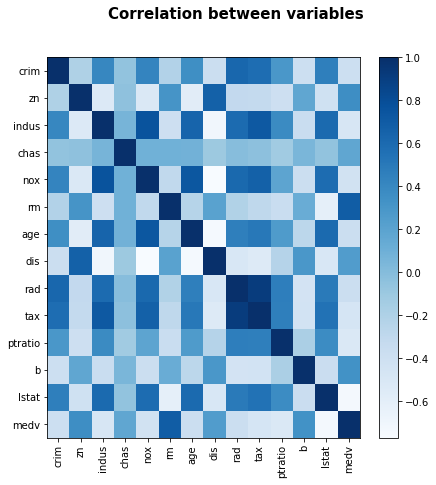

In [221]:
corr = data_housing.corr()  # corr é o método de correlação do Pandas. Acabamos de correlacionar os dados!

# Daqui para baixo, estaremos gerando o gráfico de correlação
plt.figure(figsize=(7,7))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto') # imshow exibe data como uma imagem
plt.colorbar() # gera a barra do lado direito

# Vamos incluir o nome de todas as variáveis
plt.xticks(range(len(corr)), corr.columns, rotation='vertical') # adiciona as variáveis na linha X
plt.yticks(range(len(corr)), corr.columns); # adiciona as variáveis na linha Y
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold') # adiciona um título
plt.grid(False)
plt.show()

Analisar o gráfico pode não ser tão intuitivo assim. Se você ainda não sabe como fazer, é bem simples! A correlação está sendo contada de **0** a **1**, como mostra a barra lateral direita.

Nessa mesma barra lateral, podemos ver que:
- Quanto **mais clara** a cor, **menos correlação** entre variáveis x e y temos, ou seja, correlação se aproxima de **0**;
- Quanto **mais escura** a cor, **mais correlação** entre variáveis x e y temos, ou seja, correlação se aproxima de **1**.

Nós geramos um gráfico para que seja melhor de entender o que está ocorrendo nesse _dataset_, porém saiba que os dados estão armazenados em uma matriz:

In [223]:
print(corr)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

Percebeu que o **número máximo** é **1**? Isso está ocorrendo por conta do método utilizar a **Correlação de Pearson**. Aqui está a descrição do Wikipedia:

Em estatística descritiva, o coeficiente de correlação de Pearson, também chamado de "coeficiente de correlação produto-momento" ou simplesmente de "ρ de Pearson" mede o grau da correlação (e a direcção dessa correlação - se positiva ou negativa) entre duas variáveis de escala métrica (intervalar ou de rácio/razão).

Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1:
- **ρ = 1** significa uma **correlação positiva perfeita** entre as duas variáveis;
- **ρ = -1** significa uma **correlação negativa perfeita** entre as duas variáveis. **Se uma aumenta, a outra sempre diminui**;
- **ρ = 0** significa que as duas variáveis **não dependem linearmente uma da outra**. No entanto, pode existir uma dependência não linear. Assim, o resultado **ρ = 0** deve ser investigado por outros meios."


Vamos agora identificar quais as variáveis que possuem **maior correlação**:

In [226]:
p = 0.75 # Essa é a correlação mínima que estamos considerando
var = []
for i in corr.columns: # percorre toda a tabela para cara elemento "i"
    for j in corr.columns: # percorre novamente toda a tabela para cada elemento "j"
        if(i != j):
            if np.abs(corr[i][j]) > p: # Se a correlação for maior que "p"
                var.append([i,j]) # Coloca na lista "var"
                
print('As variáveis com maior correlação:\n', var)

As variáveis com maior correlação:
 [['indus', 'nox'], ['nox', 'indus'], ['nox', 'dis'], ['dis', 'nox'], ['rad', 'tax'], ['tax', 'rad']]


Esse tipo de método é muito importante pois também nos ajuda a filtrar melhor o _dataset_. Se dois dados são muito correlacionados, um deles pode ser removido, pois podem ter um significado muito próximo e interferir em outros dados.

### Dados desbalanceados
14:50
https://www.youtube.com/watch?v=arLVNtA_FrM&list=PLSc7xcwCGNh1PJrPfLaH4MMjfDl48tmGM&index=2&ab_channel=FranciscoRodrigues